<a href="https://colab.research.google.com/github/seeun7/computer/blob/main/week9_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

피드포워드

In [2]:
import numpy as np

def sigmoid(x):
  return 1/(1+np.exp(-x))

def feed_forward(x,W1,W2,b1,b2):
  a1=x
  z2=np.dot(W1,a1)+b1
  a2=sigmoid(z2)
  z3=np.dot(W2,a2)+b2
  a3=sigmoid(z3)
  return a1,a2,a3,z2,z3

node_size={'input_layer_size':3,'hidden_layer_size':3,'output_layer_size':1}
W2=np.random.random((node_size['output_layer_size'],node_size['hidden_layer_size']))
W1=np.random.random((node_size['hidden_layer_size'],node_size['input_layer_size']))
b2=np.random.random(node_size['output_layer_size'])
b1=np.random.random(node_size['hidden_layer_size'])
X=np.array([[1,0,0],[0,0,1],[0,1,1],[1,0,1],[1,1,0],[0,1,0],[1,1,1]])
Y=np.array([1,0,0,0,1,1,0])

for x,y in zip(X,Y):
  a1,a2,a3,z1,z2=feed_forward(x,W1,W2,b1,b2)
  print('a3={},y={},Error(L2 Norm)={}'.format(a3,y,np.linalg.norm((y-a3),2)))

a3=[0.85676887],y=1,Error(L2 Norm)=0.14323112796322357
a3=[0.86323611],y=0,Error(L2 Norm)=0.8632361111943381
a3=[0.87625479],y=0,Error(L2 Norm)=0.8762547901565145
a3=[0.87926239],y=0,Error(L2 Norm)=0.879262392751349
a3=[0.87159318],y=1,Error(L2 Norm)=0.12840681770125517
a3=[0.85228625],y=1,Error(L2 Norm)=0.14771375410952026
a3=[0.88923824],y=0,Error(L2 Norm)=0.8892382422611411


경사하강법

0/1000,x=-10.000000,f(x)=205.000000,gradient=-0.300000,gradient sign=-
50/1000,x=-0.462545,f(x)=9.839400,gradient=-0.109251,gradient sign=-
100/1000,x=3.010707,f(x)=-16.042712,gradient=-0.039786,gradient sign=-
150/1000,x=4.275560,f(x)=-19.475186,gradient=-0.014489,gradient sign=-
200/1000,x=4.736181,f(x)=-19.930399,gradient=-0.005276,gradient sign=-
250/1000,x=4.903925,f(x)=-19.990770,gradient=-0.001921,gradient sign=-
300/1000,x=4.965012,f(x)=-19.998776,gradient=-0.000700,gradient sign=-
350/1000,x=4.987259,f(x)=-19.999838,gradient=-0.000255,gradient sign=-
400/1000,x=4.995360,f(x)=-19.999978,gradient=-0.000093,gradient sign=-
450/1000,x=4.998310,f(x)=-19.999997,gradient=-0.000034,gradient sign=-
500/1000,x=4.999385,f(x)=-20.000000,gradient=-0.000012,gradient sign=-
550/1000,x=4.999776,f(x)=-20.000000,gradient=-0.000004,gradient sign=-
Min Value od Cost Function is x=4.999775904626807.


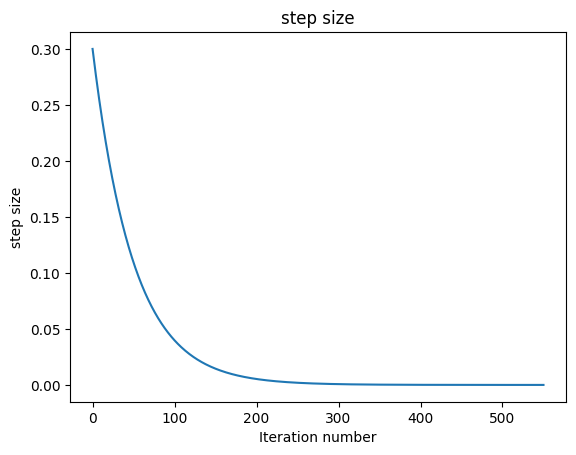

0/1000,x=10.000000,f(x)=5.000000,gradient=0.100000,gradient sign=+
50/1000,x=6.820848,f(x)=-16.684511,gradient=0.036417,gradient sign=+
100/1000,x=5.663098,f(x)=-19.560301,gradient=0.013262,gradient sign=+
150/1000,x=5.241480,f(x)=-19.941687,gradient=0.004830,gradient sign=+
200/1000,x=5.087940,f(x)=-19.992267,gradient=0.001759,gradient sign=+
250/1000,x=5.032025,f(x)=-19.998974,gradient=0.000640,gradient sign=+
300/1000,x=5.011663,f(x)=-19.999864,gradient=0.000233,gradient sign=+
350/1000,x=5.004247,f(x)=-19.999982,gradient=0.000085,gradient sign=+
400/1000,x=5.001547,f(x)=-19.999998,gradient=0.000031,gradient sign=+
450/1000,x=5.000563,f(x)=-20.000000,gradient=0.000011,gradient sign=+
500/1000,x=5.000205,f(x)=-20.000000,gradient=0.000004,gradient sign=+
Min Value od Cost Function is x=5.0002051199257265.


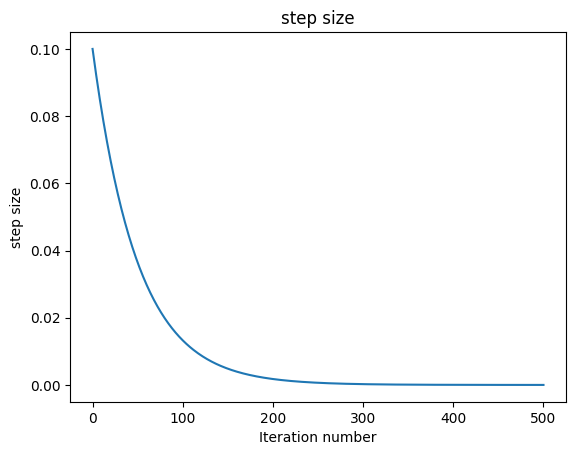

In [3]:
import matplotlib.pyplot as plt

def f(x):
  return np.power(x-5,2)-20

def f_derivative(x):
  return 2*x-10

def gradient_descent(next_x, gamma, precision, max_iteration):
  list_step=[]
  for i in range(max_iteration):
    current_x=next_x
    next_x=current_x-gamma*f_derivative(current_x)
    step=next_x-current_x
    list_step.append(abs(step))

    if i%50==0:
      print('{}/{},x={:5.6f},'.format(i, max_iteration,current_x),end="")
      gradient=gamma*f_derivative(current_x)
      print('f(x)={:5.6f},gradient={:5.6f},'.format(f(current_x),gradient),end="")
      print('gradient sign={}'.format('+' if f_derivative(current_x)>0 else '-'))

      if abs(step)<=precision:
        break
  print('Min Value od Cost Function is x={}.'.format(current_x))
  Figure,ax=plt.subplots(1,1)
  ax.title.set_text('step size')
  ax.plot(list_step)
  ax.set_ylabel('step size')
  ax.set_xlabel('Iteration number')
  plt.show()

gradient_descent(next_x=-10, gamma=0.01, precision=0.00001, max_iteration=1000)
gradient_descent(next_x=10, gamma=0.01, precision=0.00001, max_iteration=1000)

역전파 알고리즘

0/1000 cost:0.031263230311015536
100/1000 cost:0.19525782071879105
200/1000 cost:0.20634281820423245
300/1000 cost:0.19707763205988527
400/1000 cost:0.031016325221639746
500/1000 cost:0.05181024089088471
600/1000 cost:0.07186364444481896
700/1000 cost:0.011923146832316196
800/1000 cost:0.024170169803144445
900/1000 cost:0.03711137552991386
1000/1000 cost:0.06199477073431339


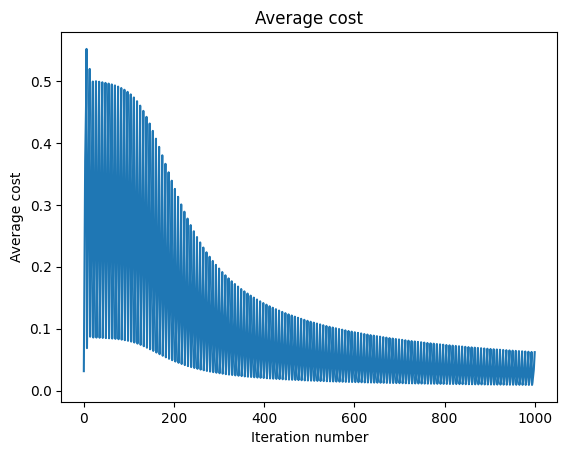

1
[0.93710603]
0
[0.0303046]
0
[0.04782523]
0
[0.05589794]
1
[0.95931987]
1
[0.91268708]
0
[0.10604329]


In [6]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def feed_forward(x,W1,W2,b1,b2):
  a1=x
  z2=np.dot(W1,a1)+b1
  a2=sigmoid(z2)
  z3=np.dot(W2,a2)+b2
  a3=sigmoid(z3)
  return a1,a2,a3,z2,z3

node_size={'input_layer_size':3,'hidden_layer_size':3,'output_layer_size':1}
W2=np.random.random((node_size['output_layer_size'],node_size['hidden_layer_size']))
W1=np.random.random((node_size['hidden_layer_size'],node_size['input_layer_size']))
b2=np.random.random(node_size['output_layer_size'])
b1=np.random.random(node_size['hidden_layer_size'])
X=np.array([[1,0,0],[0,0,1],[0,1,1],[1,0,1],[1,1,0],[0,1,0],[1,1,1]])
Y=np.array([1,0,0,0,1,1,0])

count=0
learning_rate=2.0
dataset_size=len(Y)
list_average_cost=[]
max_iteration=1000
def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))
while count<max_iteration:
  dW2=np.zeros((node_size['output_layer_size'],node_size['hidden_layer_size']))
  dW1=np.zeros((node_size['hidden_layer_size'],node_size['input_layer_size']))
  db2=np.zeros(node_size['output_layer_size'])
  db1=np.zeros(node_size['hidden_layer_size'])
  average_cost=0
  for x,y in zip(X,Y):
    a1,a2,a3,z2,z3=feed_forward(x,W1,W2,b1,b2)
    delta3=-(y-a3)*sigmoid_derivative(z3)
    average_cost+=np.linalg.norm((y-a3),2)/dataset_size
    delta2=np.dot(W2.T,delta3)*sigmoid_derivative(z2)
    dW2+=np.dot(delta3[:,np.newaxis], np.transpose(a2[:,np.newaxis]))/dataset_size
    db2+=delta3/dataset_size
    dW1+=np.dot(delta2[:,np.newaxis], np.transpose(a1[:,np.newaxis]))/dataset_size
    db1+=delta2/dataset_size

    W2+=-learning_rate*dW2
    b2+=-learning_rate*db2
    W1+=-learning_rate*dW1
    b1+=-learning_rate*db1

    list_average_cost.append(average_cost)

    if count%100==0:
      print('{}/{} cost:{}'.format(count,max_iteration,average_cost))
    count+=1
Figure,ax=plt.subplots(1,1)
ax.title.set_text('Average cost')
ax.plot(list_average_cost)
ax.set_ylabel('Average cost')
ax.set_xlabel('Iteration number')
plt.show()

for x,y in zip(X,Y):
    a1,a2,a3,z2,z3=feed_forward(x,W1,W2,b1,b2)
    print(y)
    print(a3)
